In [25]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, root_mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

In [3]:
df = pd.read_csv(r'D:\ds_ridwan\mainan-modular\data\train.csv')
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
df.drop(columns=['id'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   Academic Pressure                      27897 non-null   float64
 7   Work Pressure                          112782 non-null  float64
 8   CGPA                                   27898 non-null   float64
 9   Study Satisfaction                     27897 non-null   float64
 10  Job Satisfaction                       112790 non-null  

In [ ]:
df['Depression'].value_counts(normalize=True) # sangat2 imbalaced yaa adiq adiq..

Depression
0    0.818287
1    0.181713
Name: proportion, dtype: float64

In [6]:
df.nunique()

Name                                     422
Gender                                     2
Age                                       43
City                                      98
Working Professional or Student            2
Profession                                64
Academic Pressure                          5
Work Pressure                              5
CGPA                                     331
Study Satisfaction                         5
Job Satisfaction                           5
Sleep Duration                            36
Dietary Habits                            23
Degree                                   115
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
dtype: int64

In [7]:
# check for missing values
misval = df.isnull().sum() / len(df)*100
for i in misval.index:
    if misval[i] > 0:
        print(f"{i} : {misval[i]:.3f}% missing values")

Profession : 26.034% missing values
Academic Pressure : 80.173% missing values
Work Pressure : 19.842% missing values
CGPA : 80.172% missing values
Study Satisfaction : 80.173% missing values
Job Satisfaction : 19.837% missing values
Dietary Habits : 0.003% missing values
Degree : 0.001% missing values
Financial Stress : 0.003% missing values


In [20]:
# after see the dist of NaN, i decide to drop some cols
col_to_drop = ['Academic Pressure','CGPA','Study Satisfaction']
df.drop(columns=col_to_drop, inplace=True)

In [21]:
df.shape

(140700, 16)

In [8]:
print(df.sample(8))

               Name  Gender   Age       City Working Professional or Student  \
103835      Ishaani  Female  39.0     Kanpur            Working Professional   
44465         Arnav    Male  33.0  Hyderabad                         Student   
72499         Tanya  Female  60.0     Kanpur            Working Professional   
131890       Aniket    Male  56.0    Chennai            Working Professional   
115527       Harsha    Male  46.0     Rajkot            Working Professional   
107123       Ayansh    Male  23.0    Kolkata            Working Professional   
122988         Diya  Female  44.0      Thane            Working Professional   
83345   Raghavendra    Male  47.0     Nagpur            Working Professional   

              Profession  Academic Pressure  Work Pressure  CGPA  \
103835        HR Manager                NaN            5.0   NaN   
44465                NaN                4.0            NaN  7.09   
72499          Architect                NaN            5.0   NaN   
131890 

In [9]:
# seperate into numerical and categorical columns
num_cols = [col for col in df.columns if df[col].dtype != 'O']
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

In [10]:
num_cols

['Age',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress',
 'Depression']

In [11]:
cat_cols

['Name',
 'Gender',
 'City',
 'Working Professional or Student',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

## Mini EDA

In [15]:
def eda_viz(df, top_k=15):
    cat_cols = df.select_dtypes(include='object').columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns

    print(f'🔸 Found {len(cat_cols)} categorical columns and {len(num_cols)} numerical columns.')

    for col in cat_cols:
        plt.figure(figsize=(10,4))
        vc = df[col].value_counts()
        title = f'Distribution of {col}'
        if len(vc) > top_k:
            vc = vc[:top_k]
            sns.barplot(x=vc.index, y=vc.values)
            plt.title(f'{title} (Top {top_k})')
        else:
            sns.countplot(data=df, x=col, order=vc.index)
            plt.title(title)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    for col in num_cols:
        plt.figure(figsize=(14,4))
        plt.subplot(1,3,1)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')

        plt.subplot(1,3,2)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')

        plt.subplot(1,3,3)
        sns.violinplot(x=df[col])
        plt.title(f'Violinplot of {col}')

        plt.tight_layout()
        plt.show()


🔸 Found 10 categorical columns and 9 numerical columns.


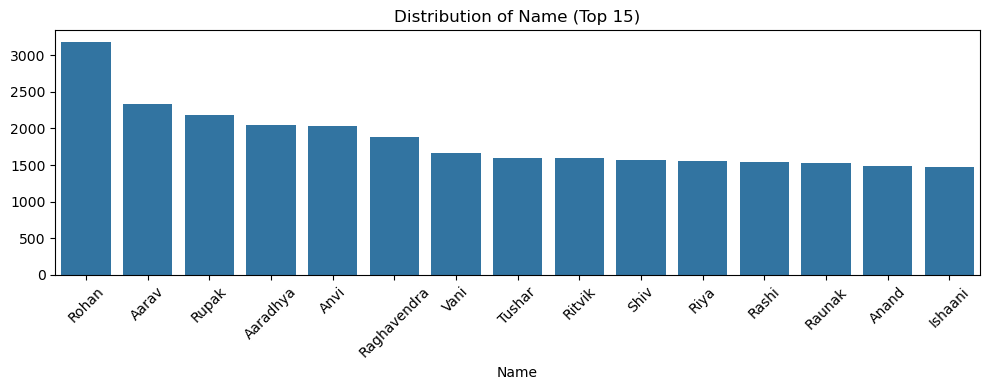

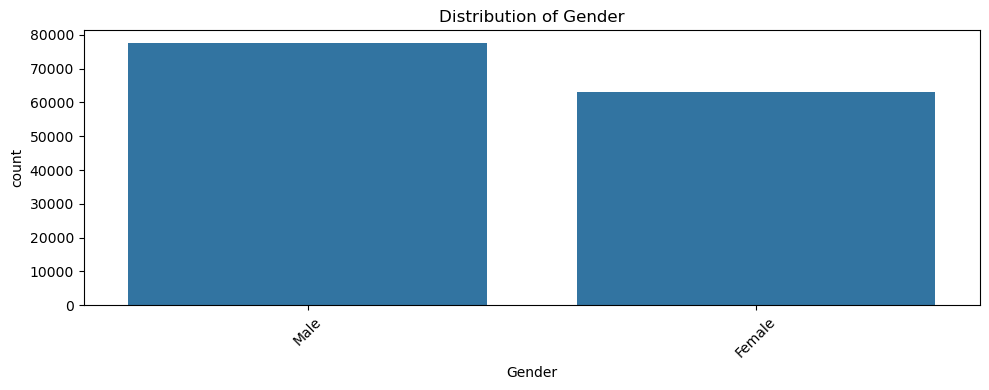

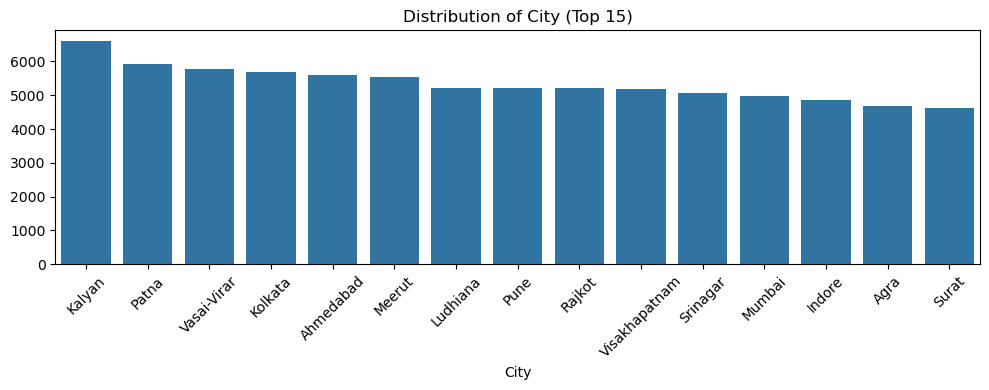

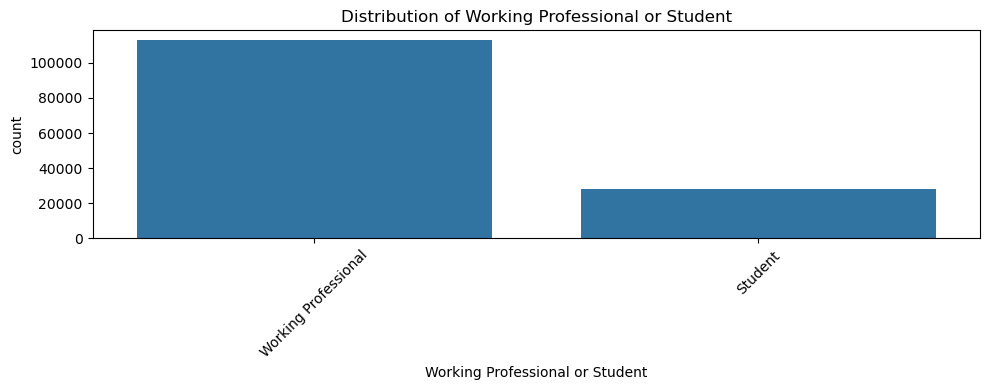

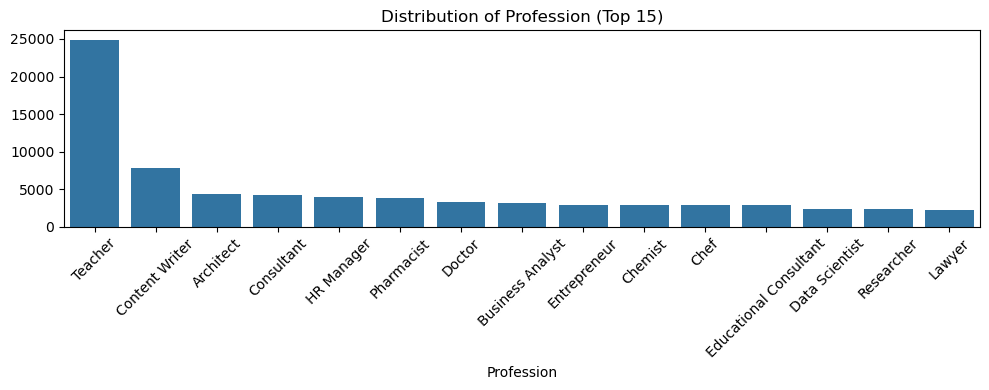

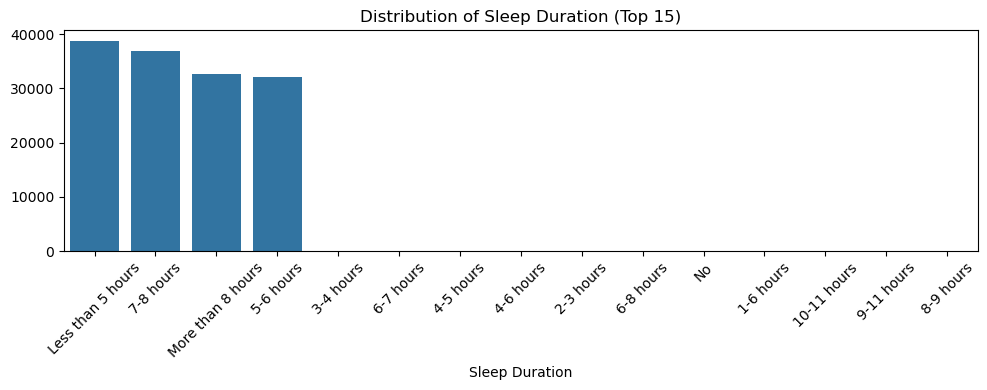

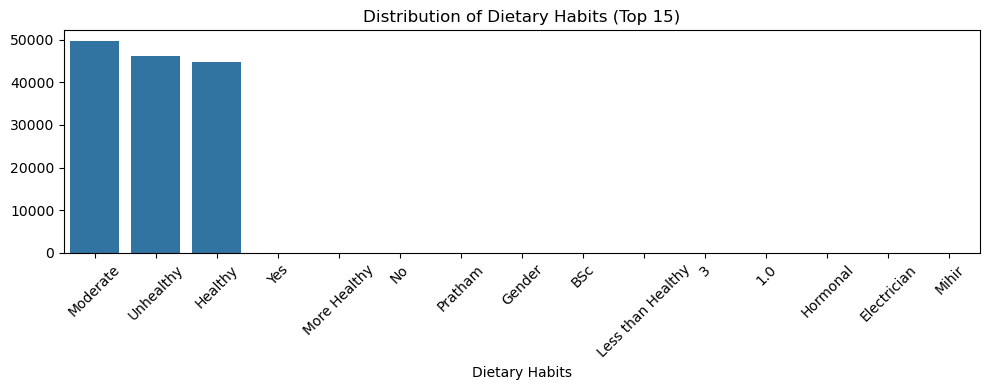

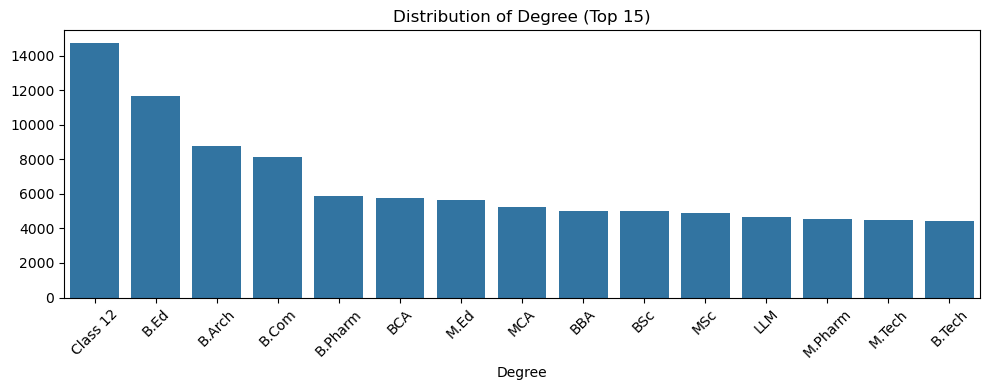

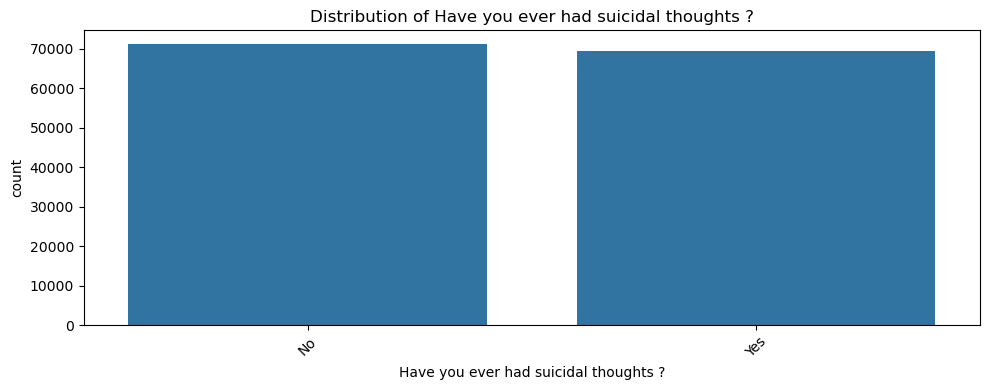

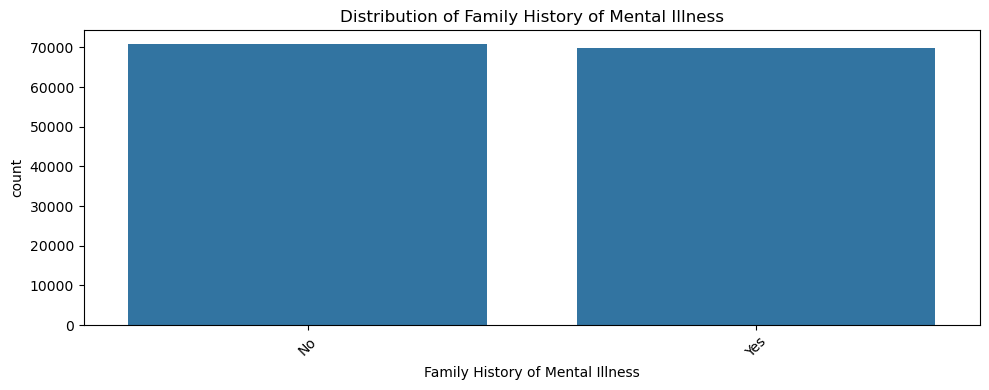

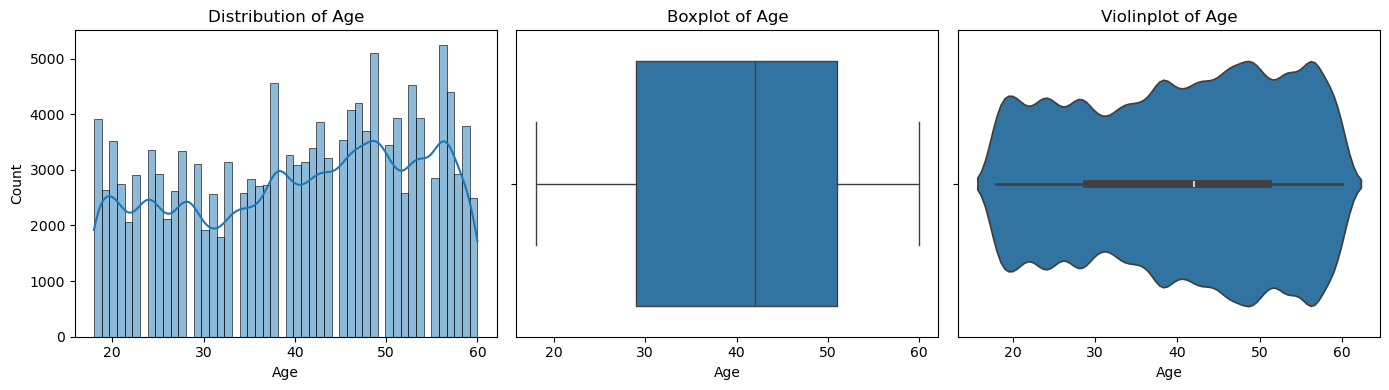

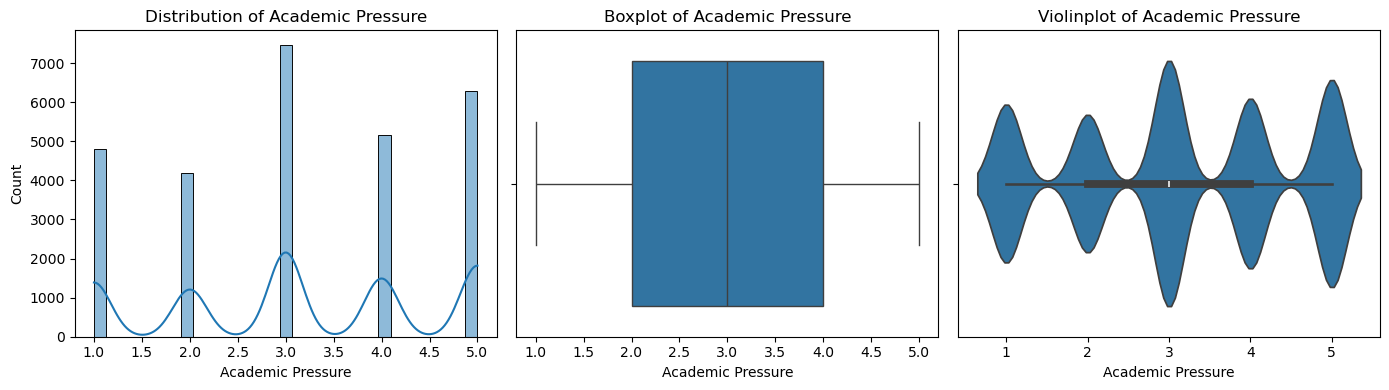

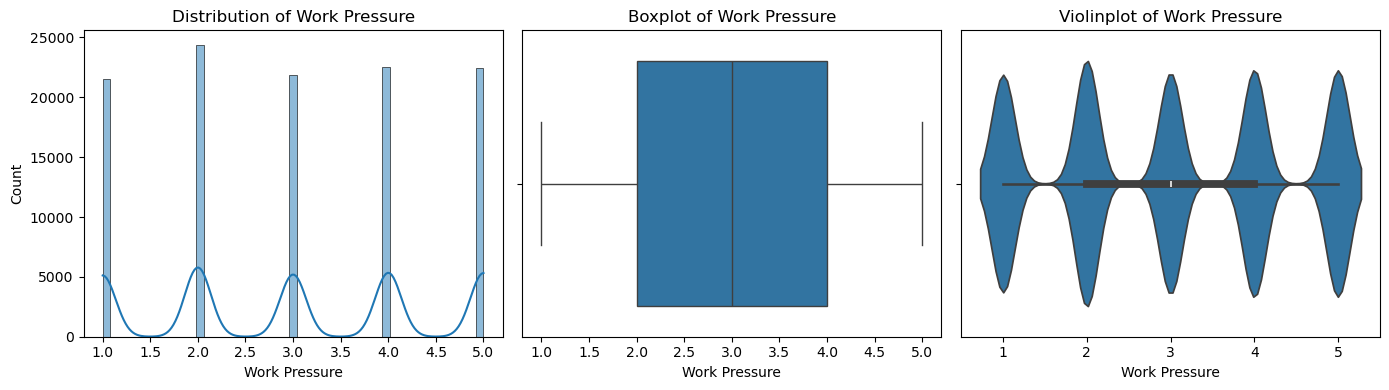

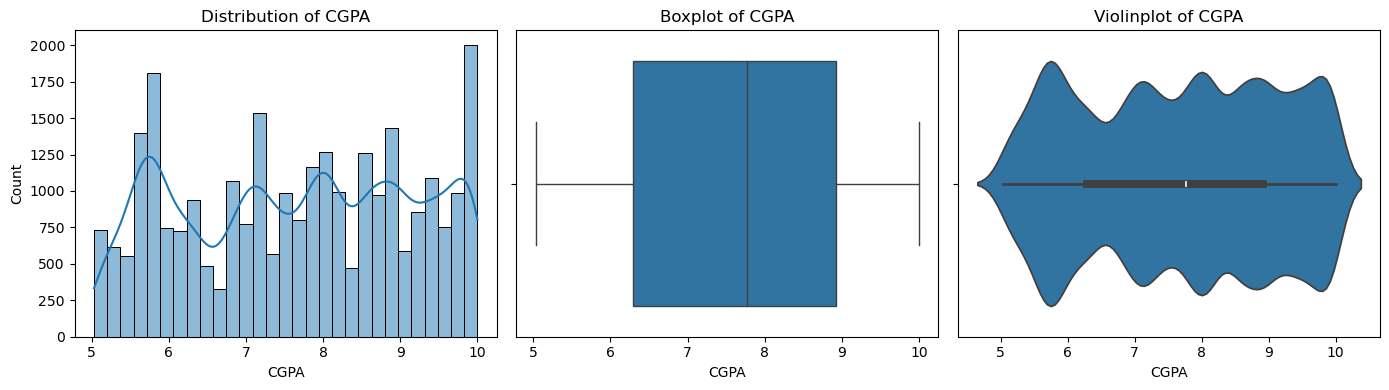

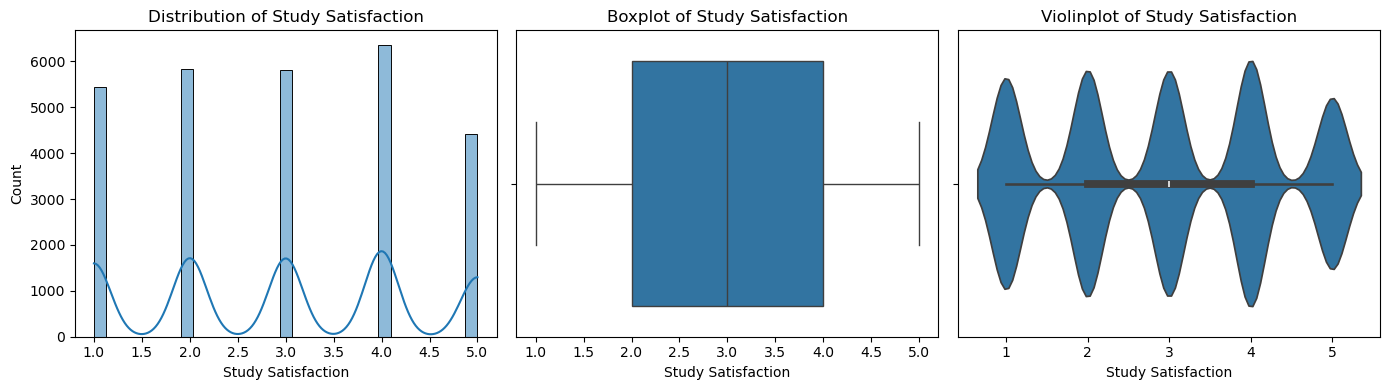

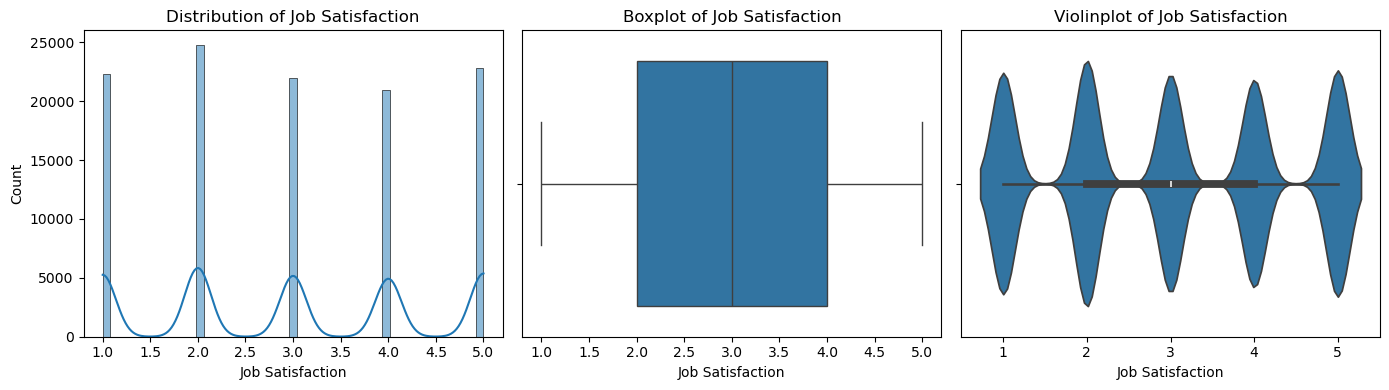

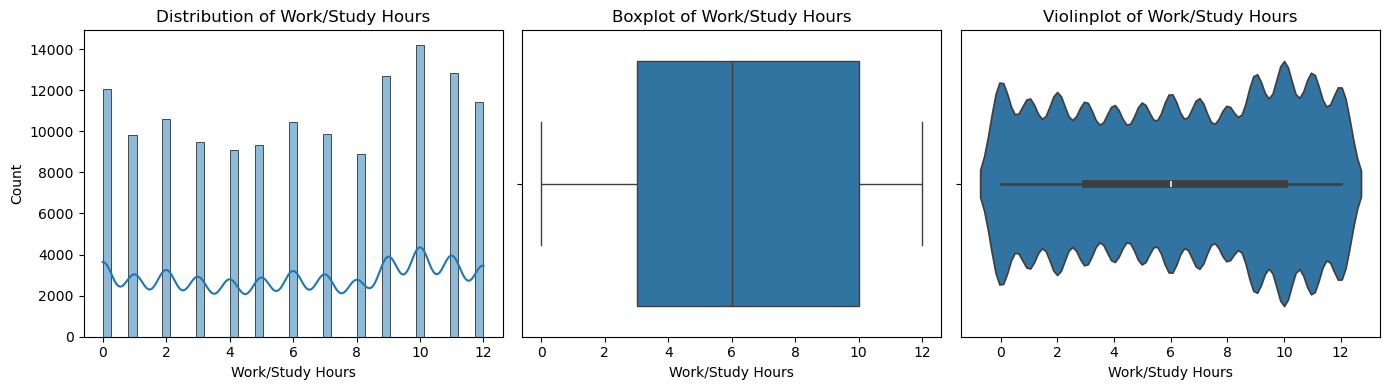

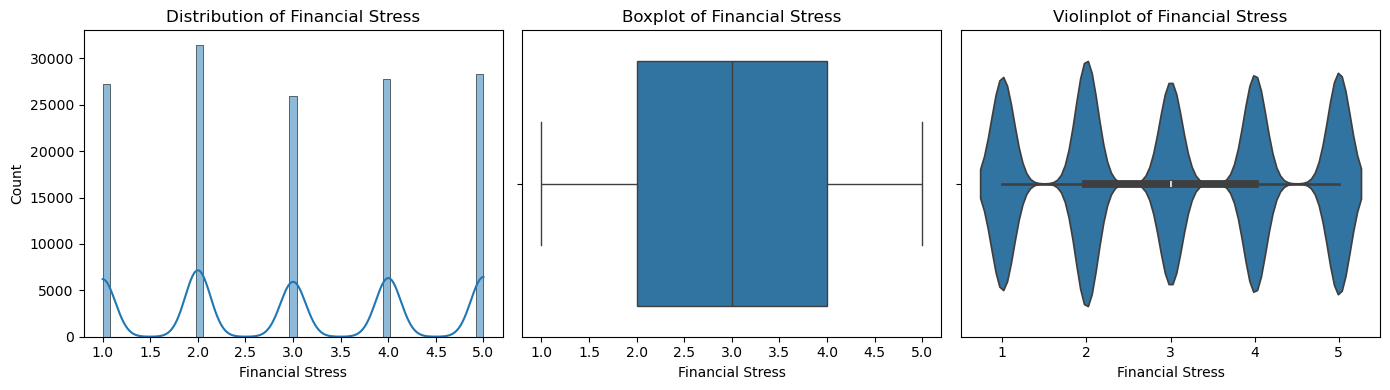

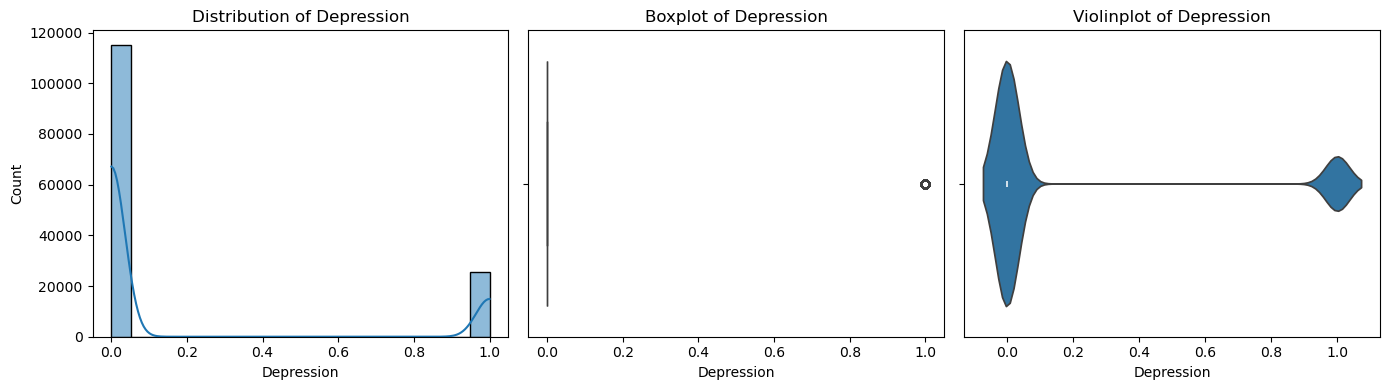

In [16]:
eda_viz(df)

# Building preprocess phase

In [23]:
def build_preprocessor(cat_cols,num_cols,strategy_num='mean',strategy_cat='most_frequent',encoding='onehot',scaling=False):
    transformers = []

    if cat_cols:
        cat_pipeline = Pipeline([
            ('imputer',SimpleImputer(strategy=strategy_cat)),
            ('encoder',OneHotEncoder(handle_unknown='ignore',sparse=False) if encoding=='onehot' else ('encoder','passthrough'))
        ])

    if num_cols:
        num_pipeline = Pipeline([
            ('imputer',SimpleImputer(strategy=strategy_num)),
            ('scalier',RobustScaler() if scaling else 'passthrough')
        ])

    return ColumnTransformer(transformers=transformers)

# Modeling 

In [26]:
def evaluate_models(X,y,models,task_type,preprocessor,n_splits=5):
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=42)
    results = {name: [] for name in models}

    for fold, (train_idx,val_idx) in enumerate(kf.split(X)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        # udah di split, sekarang msuk ke preprocessingnya
        X_train_proc = preprocessor.fit_transform(X_train)
        X_val_proc = preprocessor.transform(X_val)

        for name, model in models.items():
            model.fit(X_train_proc,y_train)
            preds = model.predict(X_val_proc)

        if task_type == 'category':
            acc = accuracy_score(y_val, preds)
            f1 = f1_score(y_val, preds, average="macro")
            results[name].append({"accuracy": acc, "f1": f1})
        else:
            rmse = root_mean_squared_error(y_val, preds, squared=False)
            mae = mean_absolute_error(y_val, preds)
            results[name].append({"rmse": rmse, "mae": mae})

    return results

In [ ]:
# # coba contoh aja kalo kita ad di dir baru buat mini EDA (CUMA ISENG SERIUSSS....)

# def univariate_eda(df,cat_cols,num_cols):
#     for col in cat_cols:
#         plt.figure(figsize=(10,4))
#         sns.countplot(data=df,x=col)
#         plt.title()
#         plt.tight_layout()
#         plt.show()


#     for col in num_cols:
#         plt.figure()
#         sns.histplot(df[col],kde=True)

#     # sama smua ajaa terus kalo bivariate gimana?

# def bivariate_eda(df,num_cols):
#     # kita cari dlu corrnya masing masing
#     corr = df[num_cols].corr()
#     sns.heatmap(corr, annot=True, fmt='.2f')
#     lainya sama ajaaa


# kf = KFold()

# for fold,(train_idx,val_idx) in enumerate(kf.split(X)):
#     # dari sini kita split dlu
#     X_train, X_val = X.iloc[train_idx], lalalala

#     # baru dari ini kita preprocess dlu
#     X_train_proc = preprocessor.fit_transform()


#     # barulah dari sini kita masuk ke trainingnya
#     model.fit(X_train_proc,y_train)
#     preds = model.predict(X_val_proc)

#     if task == 'cat':
#         acc = accuracy_score(y_val, preds)